In [10]:
from pathlib import Path
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use("ggplot")

data_wd = Path.home() / '.data' / 'optiver-trading-at-the-close'

train = pd.read_csv(data_wd / 'train.csv')
train.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [13]:
print(f'# of Rows: {train.shape[0]:,.0f}')

# of Rows: 5,237,980


In [14]:
cols = train.columns
print(f'# of Columns: {len(cols)}')
print('\nColumns\n' + '-' * 80)
print(', '.join(cols))

# of Columns: 17

Columns
--------------------------------------------------------------------------------
stock_id, date_id, seconds_in_bucket, imbalance_size, imbalance_buy_sell_flag, reference_price, matched_size, far_price, near_price, bid_price, bid_size, ask_price, ask_size, wap, target, time_id, row_id


# Metrics Summary

In [15]:
metric_width = 50
val_width = 5

metric, val = '# of Stocks', train.stock_id.nunique()
print(f'{metric:{metric_width}} {val:>{val_width}}')

metric, val = '# of Days', train.date_id.nunique()
print(f'{metric:{metric_width}} {val:>{val_width}}')

metric, val = 'Avg. Seconds per Day', (train.groupby('date_id').seconds_in_bucket
                            .nunique().drop_duplicates()[0])
print(f'{metric:{metric_width}} {val:>{val_width}}')

# of Stocks                                          200
# of Days                                            481
Avg. Seconds per Day                                  55


# Single Record

In [16]:
mask = (train.loc[:, 'stock_id'] == 0) & (train.loc[:, 'date_id'] == 0)
train.loc[mask, :]

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
191,0,0,10,1299772.70,1,1.000026,15261106.63,NaN,NaN,0.999812,13996.50,1.000026,23519.16,0.999892,0.389814,1,0_10_0
382,0,0,20,1299772.70,1,0.999919,15261106.63,NaN,NaN,0.999812,4665.50,0.999919,12131.60,0.999842,4.220009,2,0_20_0
573,0,0,30,1299772.70,1,1.000133,15261106.63,NaN,NaN,1.000026,55998.00,1.000133,46203.30,1.000085,5.450249,3,0_30_0
764,0,0,40,1218204.43,1,1.000455,15342674.90,NaN,NaN,1.000241,14655.95,1.000455,26610.45,1.000317,3.169775,4,0_40_0
955,0,0,50,1218204.43,1,1.000455,15342674.90,NaN,NaN,1.000348,42012.00,1.000455,9897.22,1.000434,0.599623,5,0_50_0
1146,0,0,60,1218204.43,1,1.000562,15342674.90,NaN,NaN,1.000455,14005.50,1.000562,10085.04,1.000517,-0.200272,6,0_60_0
1337,0,0,70,1264494.89,1,1.000455,15352380.96,NaN,NaN,1.000348,37904.16,1.000455,17366.82,1.000421,2.410412,7,0_70_0
1528,0,0,80,1189832.86,1,1.000241,15427043.00,NaN,NaN,1.000133,9427.34,1.000241,61984.40,1.000148,-0.389814,8,0_80_0
1719,0,0,90,1189272.89,1,1.000562,15427602.97,NaN,NaN,1.000348,23340.00,1.000562,40433.54,1.000426,-4.339814,9,0_90_0


# Target

In [9]:
train.target.isna().value_counts()

False    5237892
True          88
Name: target, dtype: int64

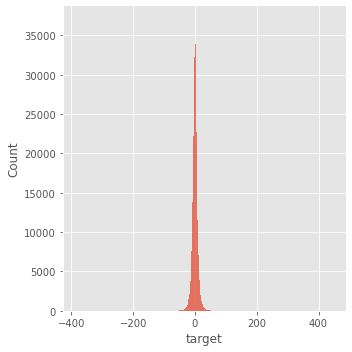

In [6]:
sns.displot(train, x='target')
plt.show()

There's a wide distribution!

In [7]:
print(train.target.describe()
      .map('{:,.2f}'.format)
      .to_string())

count    5,237,892.00
mean            -0.05
std              9.45
min           -385.29
25%             -4.56
50%             -0.06
75%              4.41
max            446.07
